In [1]:
# Import the Python modules and the data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

water_df = pd.read_csv("water_potability.csv")
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [2]:
# Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [3]:
# Check missing values using the 'isnull().sum()' function.
water_df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
# Check the percentage of missing values
water_df.isnull().sum() * 100 / water_df.shape[0]

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [5]:
# Handle missing value with median of features
water_df["ph"].fillna(value = water_df["ph"].median(), inplace = True)
water_df["Sulfate"].fillna(value = water_df["Sulfate"].median(), inplace = True)
water_df["Trihalomethanes"].fillna(value = water_df["Trihalomethanes"].median(), inplace = True)

In [6]:
# Check the percentage of missing values
water_df.isnull().sum() * 100 / water_df.shape[0]

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

---

In [7]:
water_df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

<Axes: xlabel='Potability', ylabel='count'>

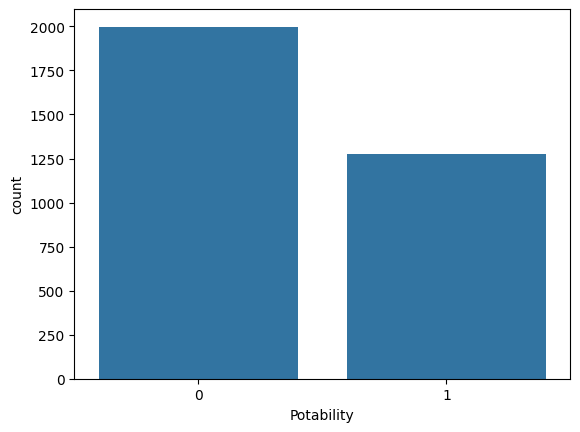

In [8]:
# Create a countplot for target class.
sns.countplot(x=water_df['Potability'])

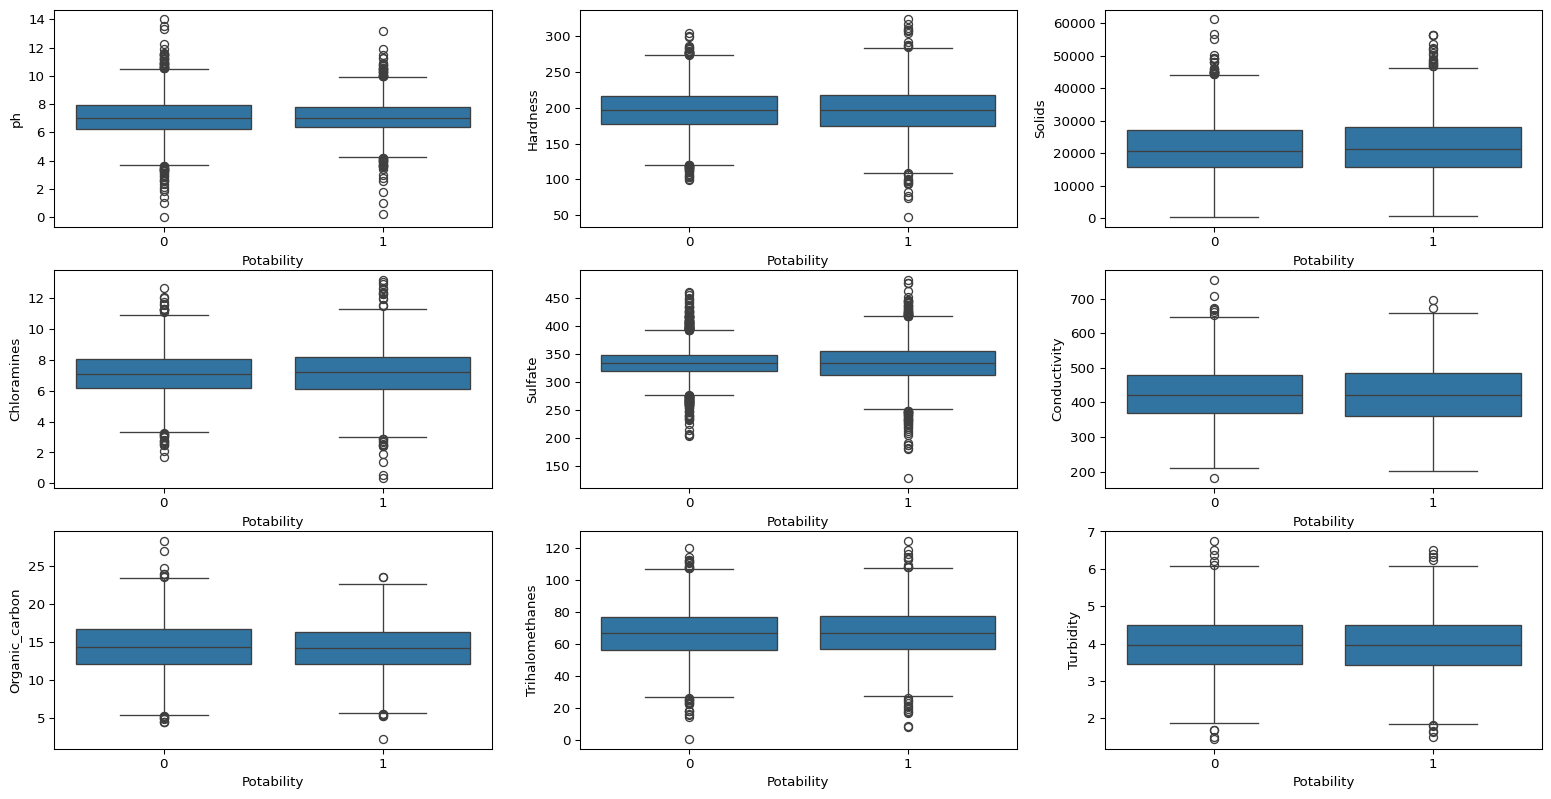

In [9]:
# Create boxplots for 'water_df' columns using subplot.
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 10), dpi = 96, sharex = False)
count = 0

for i in range(0, 3):
  for j in range (0, 3):
    column = water_df.iloc[:, count]    # Fetching the current column and all rows of that column.
    sns.boxplot(x = 'Potability', y = column, data = water_df, ax = axis[i, j])
    count = count + 1

plt.show()

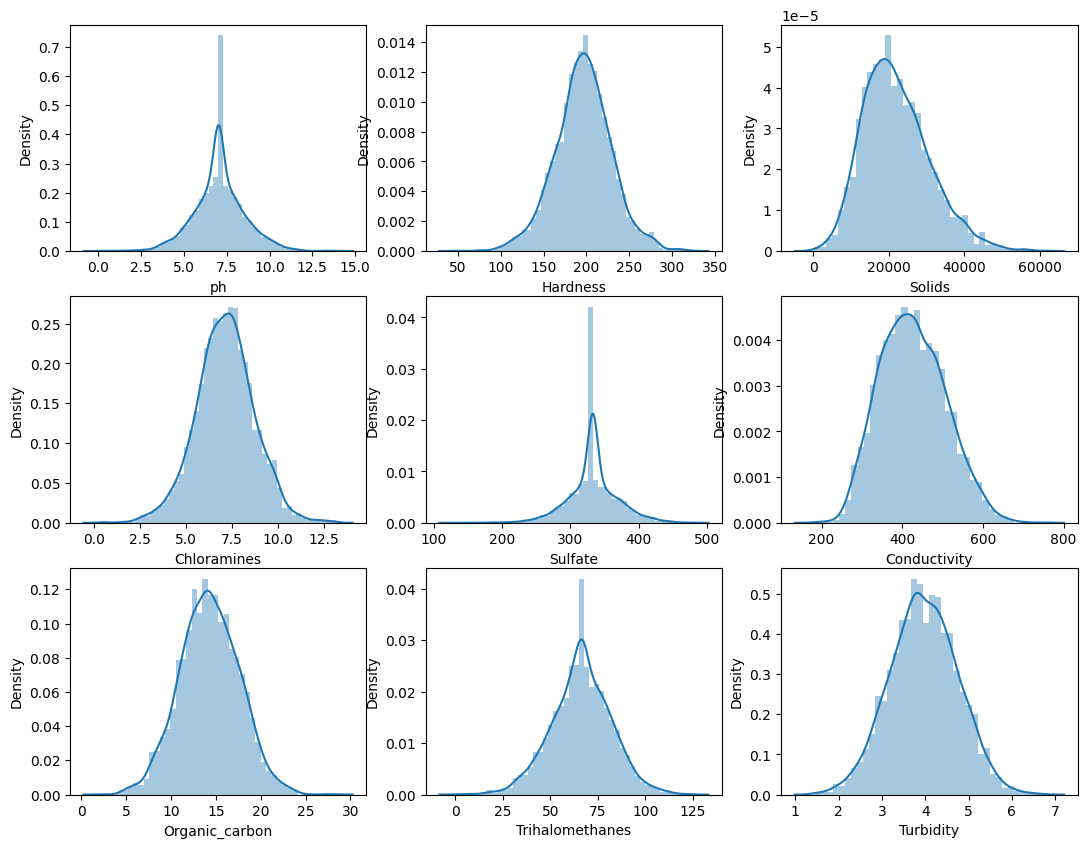

In [10]:
# Create histogram for numeric columns using subplot.
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (13, 10), dpi = 100)
# As there are 9 columns, we created subplot having 3 rows and 3 columns.
count = 0

for i in range(0, 3):
  for j in range (0, 3):
    column = water_df.iloc[:, count]      # Fetching the current column and all rows of that column.

    sns.distplot(column, hist = True, ax = axis[i, j])
    count = count + 1

plt.show()

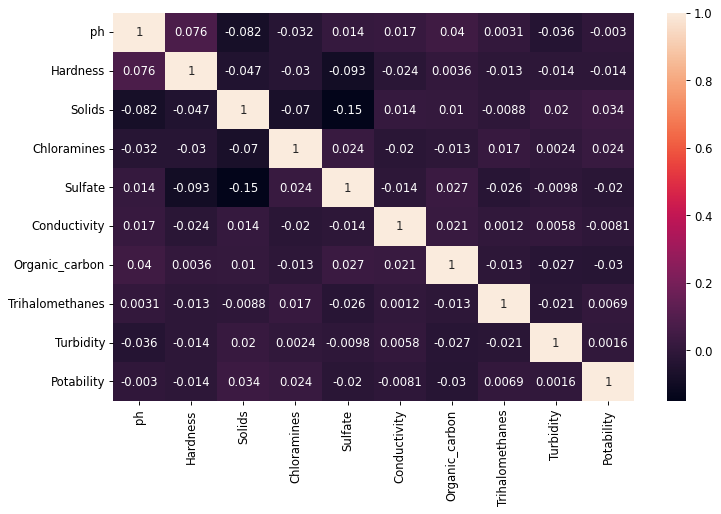

In [11]:
# Check the correlation of features
corr_df = water_df.corr()
plt.figure(figsize = (10, 6), dpi = 84)
sns.heatmap(corr_df, annot = True)
plt.show()

In [12]:
# Split the data into dependent and independent features
features_df = water_df.drop(['Potability'], axis = 1)
target_df = water_df['Potability']
features_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [13]:
# Normalise the column values.
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
scaled_features = standard_scaler.fit_transform(features_df)
X_scaled = pd.DataFrame(scaled_features)
X_scaled.columns = features_df.columns
X_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218
2,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365
3,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412
4,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786


In [14]:
# Perform train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target_df, test_size = 0.3,
                                                    random_state = 42, stratify = target_df)

# Print the shape of train and test sets.
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2293, 9)
Shape of X_test: (983, 9)
Shape of y_train: (2293,)
Shape of y_test: (983,)


In [15]:
#  Train kNN classifier model for 'k = 3'
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, y_train)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", knn3.score(X_train, y_train))
print("Test set accuracy:", knn3.score(X_test, y_test))

Train set accuracy: 0.8146532926297427
Test set accuracy: 0.612410986775178


In [16]:
#  Train kNN classifier model for 'k = 7'
knn7 = KNeighborsClassifier(n_neighbors = 7)
knn7.fit(X_train, y_train)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", knn7.score(X_train, y_train))
print("Test set accuracy:", knn7.score(X_test, y_test))

Train set accuracy: 0.7313563017880506
Test set accuracy: 0.6185147507629705


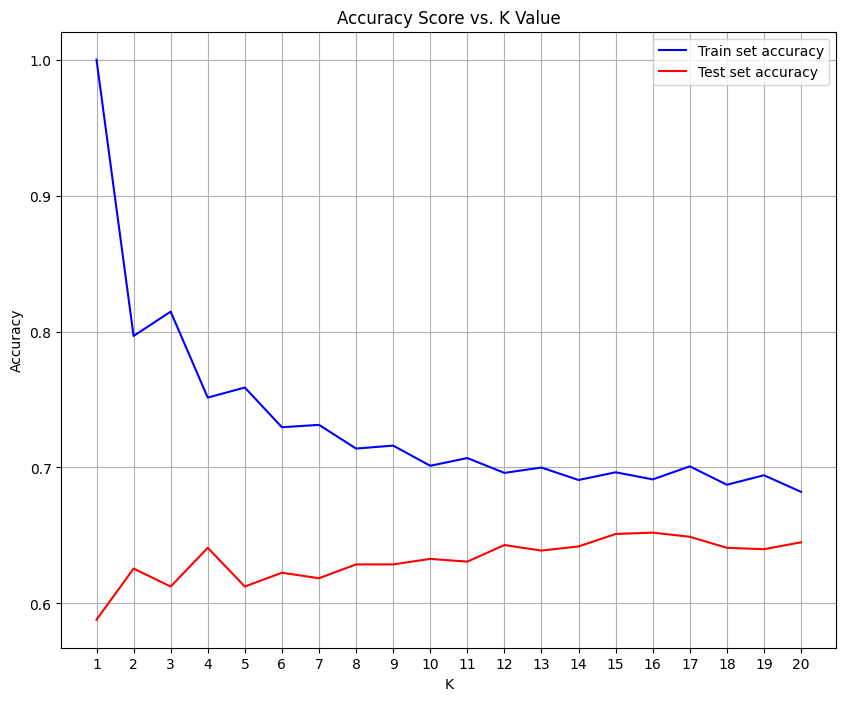

In [17]:
# Plot accuracy scores of train and test sets for 1 to 20 neighbours.

# Create two lists store the accuracy scores of train and test set
accuracy_train = []
accuracy_test= []

# Create a 'for' loop to get the accuracy scores of train and test set
for k in range(1, 21):

    # Perform KNeighborsClassifier with n_neighbors = k
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the train data in the model
    knn.fit(X_train, y_train)

    # Append the score into different lists
    accuracy_train.append(knn.score(X_train, y_train))
    accuracy_test.append(knn.score(X_test, y_test))

# Plot the accuracy scores of train and test sets
plt.figure(figsize = (10, 8))
plt.grid()
plt.xticks(range(1, 21, 1))
plt.plot(range(1, 21), accuracy_train, color= 'blue', label = "Train set accuracy")
plt.plot(range(1, 21), accuracy_test, color= 'red', label = "Test set accuracy")
plt.title('Accuracy Score vs. K Value')
plt.legend()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [18]:
# Train kNN classifier model for 'k = 15'
knn15 = KNeighborsClassifier(n_neighbors = 15)
knn15.fit(X_train, y_train)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", knn15.score(X_train, y_train))
print("Test set accuracy:", knn15.score(X_test, y_test))

Train set accuracy: 0.6964675098124727
Test set accuracy: 0.6510681586978637


In [19]:
#  Display the precision, recall and f1-score values.
from sklearn.metrics import classification_report
print(classification_report(y_test, knn15.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       600
           1       0.62      0.28      0.38       383

    accuracy                           0.65       983
   macro avg       0.64      0.58      0.57       983
weighted avg       0.64      0.65      0.61       983



In [20]:
import sklearn
import imblearn
print(sklearn.__version__)
print(imblearn.__version__)


1.7.2
0.14.0


In [21]:
print(X_scaled.shape)
target_df.shape

(3276, 9)


(3276,)

Original class distribution:
Counter({0: 1998, 1: 1278})


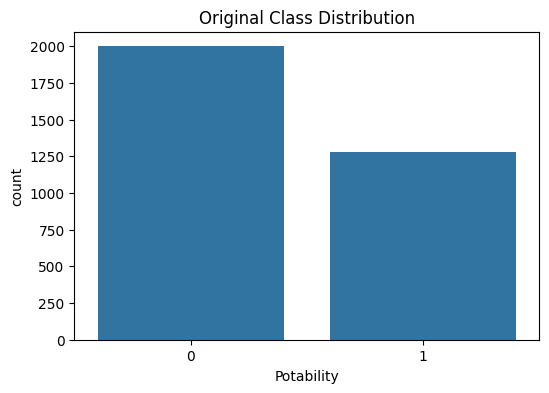

Class distribution after SMOTE:
Counter({0: 1998, 1: 1998})


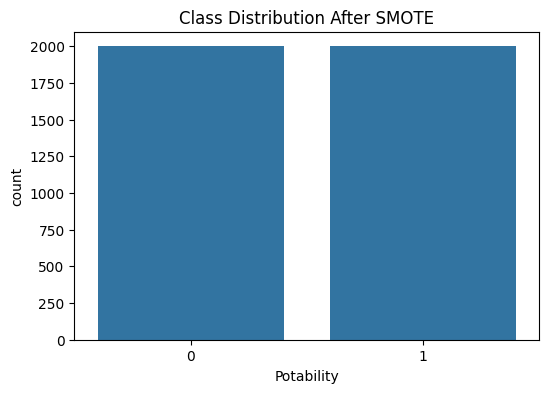

In [22]:
from collections import Counter
from imblearn.over_sampling import SMOTE

X,y = X_scaled, target_df
# Original class distribution
print("Original class distribution:")
print(Counter(y))

# Plot original distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Original Class Distribution")
plt.show()

# Apply SMOTE to balance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Plot new distribution
print("Class distribution after SMOTE:")
print(Counter(y_resampled))

plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()


In [23]:
print(X_resampled.shape)
y_resampled.shape

(3996, 9)


(3996,)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3,
                                                    random_state = 42, stratify = y_resampled)

# Print the shape of train and test sets.
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2797, 9)
Shape of X_test: (1199, 9)
Shape of y_train: (2797,)
Shape of y_test: (1199,)


In [25]:
knn3_after_SMOTE = KNeighborsClassifier(n_neighbors = 3)
knn3_after_SMOTE.fit(X_train, y_train)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", knn3_after_SMOTE.score(X_train, y_train))
print("Test set accuracy:", knn3_after_SMOTE.score(X_test, y_test))

Train set accuracy: 0.8455488022881659
Test set accuracy: 0.6947456213511259


In [26]:
knn15_after_SMOTE = KNeighborsClassifier(n_neighbors = 15)
knn15_after_SMOTE.fit(X_train, y_train)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", knn15_after_SMOTE.score(X_train, y_train))
print("Test set accuracy:", knn15_after_SMOTE.score(X_test, y_test))

Train set accuracy: 0.6950303897032535
Test set accuracy: 0.6413678065054211


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, knn15_after_SMOTE.predict(X_test)))
print(confusion_matrix(y_test, knn15_after_SMOTE.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63       600
           1       0.63      0.67      0.65       599

    accuracy                           0.64      1199
   macro avg       0.64      0.64      0.64      1199
weighted avg       0.64      0.64      0.64      1199

[[368 232]
 [198 401]]


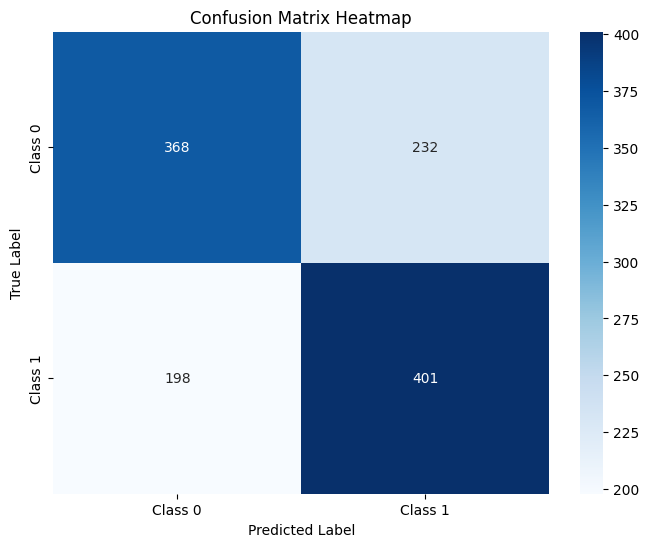

In [28]:
cm=confusion_matrix(y_test, knn15_after_SMOTE.predict(X_test))
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Class 0', 'Class 1'], # Replace with your class labels
                yticklabels=['Class 0', 'Class 1']) # Replace with your class labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

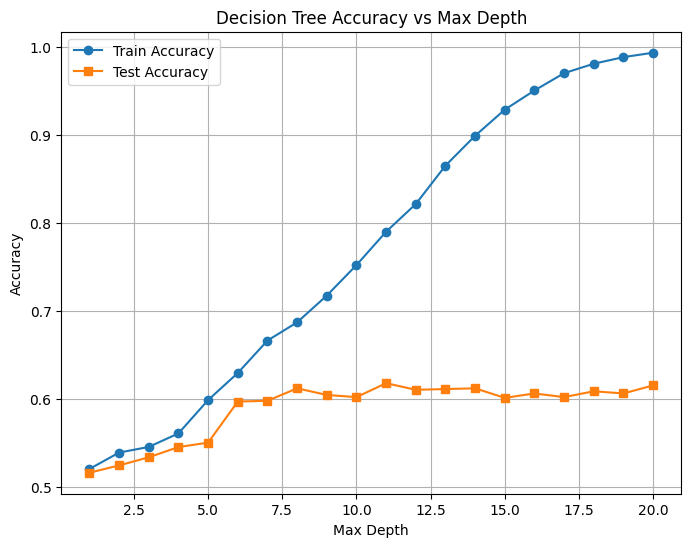

=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

           0       0.59      0.62      0.61       600
           1       0.60      0.58      0.59       599

    accuracy                           0.60      1199
   macro avg       0.60      0.60      0.60      1199
weighted avg       0.60      0.60      0.60      1199


Confusion Matrix:
[[370 230]
 [252 347]]


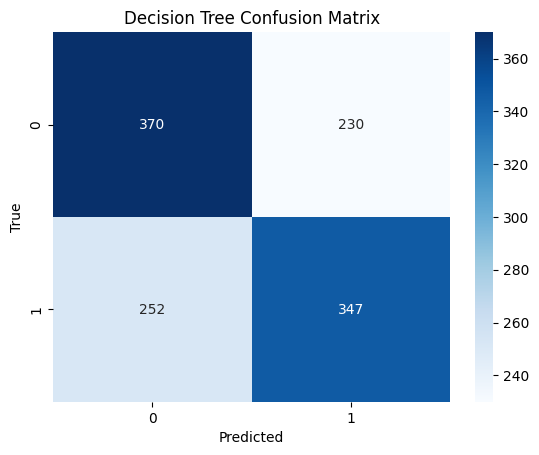

In [29]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# تست چند عمق مختلف
depths = range(1, 21)
train_acc, test_acc = [], []

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    train_acc.append(dt.score(X_train, y_train))
    test_acc.append(dt.score(X_test, y_test))

# رسم نمودار دقت
plt.figure(figsize=(8, 6))
plt.plot(depths, train_acc, label="Train Accuracy", marker='o')
plt.plot(depths, test_acc, label="Test Accuracy", marker='s')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs Max Depth")
plt.legend()
plt.grid()
plt.show()

# مدل نهایی با عمق بهینه (مثلاً 7)
dt_final = DecisionTreeClassifier(max_depth=7, random_state=42)
dt_final.fit(X_train, y_train)

y_pred_dt = dt_final.predict(X_test)

print("=== Decision Tree Classification Report ===")
print(classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


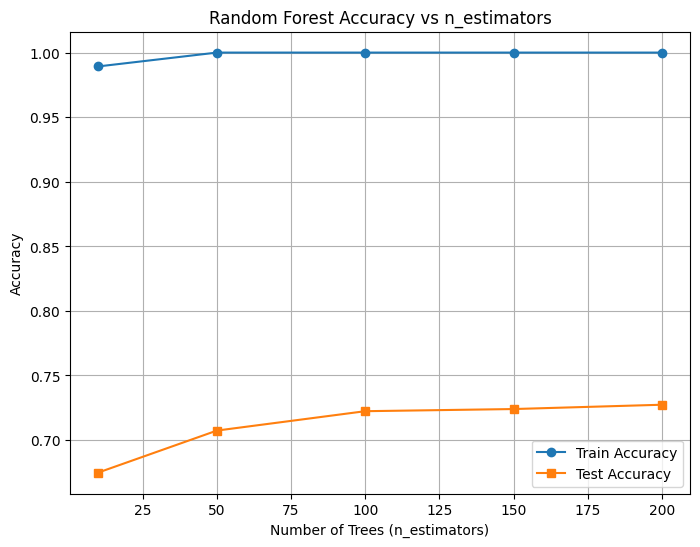

=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.72      0.73      0.73       600
           1       0.73      0.71      0.72       599

    accuracy                           0.72      1199
   macro avg       0.72      0.72      0.72      1199
weighted avg       0.72      0.72      0.72      1199


Confusion Matrix:
[[440 160]
 [173 426]]


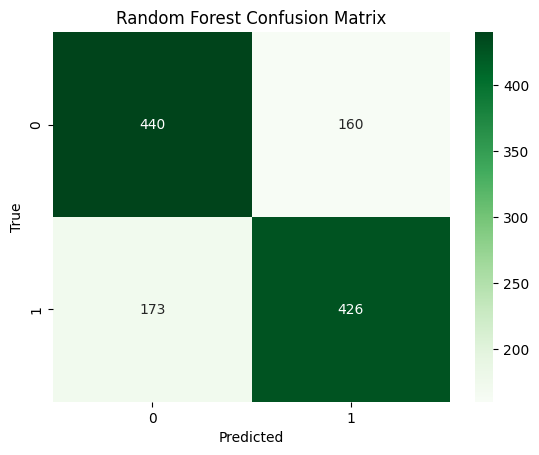

In [30]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# تست چند تعداد درخت مختلف
n_estimators = [10, 50, 100, 150, 200]
train_acc, test_acc = [], []

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    train_acc.append(rf.score(X_train, y_train))
    test_acc.append(rf.score(X_test, y_test))

plt.figure(figsize=(8, 6))
plt.plot(n_estimators, train_acc, label="Train Accuracy", marker='o')
plt.plot(n_estimators, test_acc, label="Test Accuracy", marker='s')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs n_estimators")
plt.legend()
plt.grid()
plt.show()

# مدل نهایی
rf_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_final.fit(X_train, y_train)
y_pred_rf = rf_final.predict(X_test)

print("=== Random Forest Classification Report ===")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


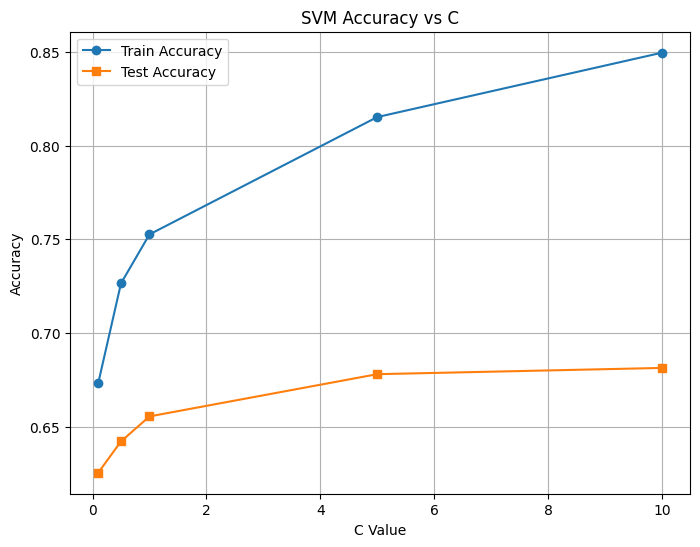

=== SVM Classification Report ===
              precision    recall  f1-score   support

           0       0.65      0.66      0.66       600
           1       0.66      0.65      0.65       599

    accuracy                           0.66      1199
   macro avg       0.66      0.66      0.66      1199
weighted avg       0.66      0.66      0.66      1199


Confusion Matrix:
[[397 203]
 [210 389]]


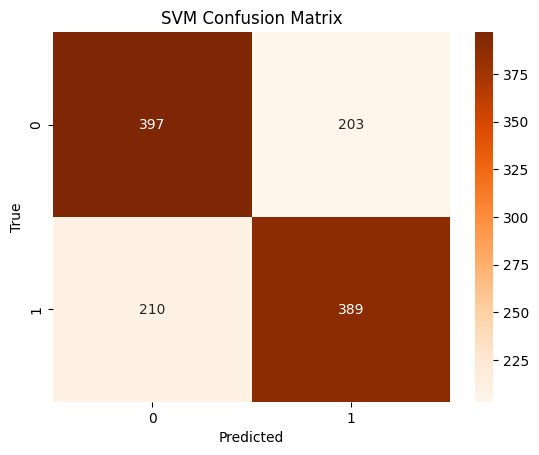

In [31]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC

# بررسی چند مقدار مختلف C
C_values = [0.1, 0.5, 1, 5, 10]
train_acc, test_acc = [], []

for c in C_values:
    svm = SVC(C=c, kernel='rbf', random_state=42)
    svm.fit(X_train, y_train)
    train_acc.append(svm.score(X_train, y_train))
    test_acc.append(svm.score(X_test, y_test))

plt.figure(figsize=(8, 6))
plt.plot(C_values, train_acc, label="Train Accuracy", marker='o')
plt.plot(C_values, test_acc, label="Test Accuracy", marker='s')
plt.xlabel("C Value")
plt.ylabel("Accuracy")
plt.title("SVM Accuracy vs C")
plt.legend()
plt.grid()
plt.show()

# مدل نهایی با C=1
svm_final = SVC(C=1, kernel='rbf', random_state=42)
svm_final.fit(X_train, y_train)
y_pred_svm = svm_final.predict(X_test)

print("=== SVM Classification Report ===")
print(classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Oranges')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


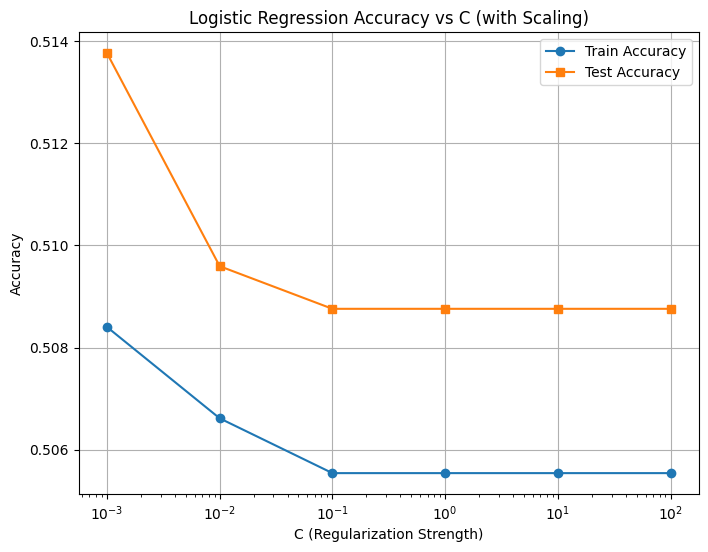

Best Parameters: {'C': 0.01, 'solver': 'liblinear'}

=== Optimized Logistic Regression Classification Report ===
              precision    recall  f1-score   support

           0       0.51      0.53      0.52       600
           1       0.51      0.49      0.50       599

    accuracy                           0.51      1199
   macro avg       0.51      0.51      0.51      1199
weighted avg       0.51      0.51      0.51      1199


Confusion Matrix:
[[319 281]
 [307 292]]


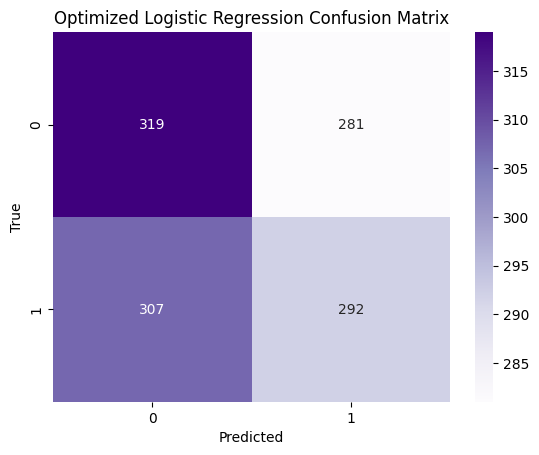

In [38]:
# ======================================================
# Logistic Regression (Optimized)
# ======================================================
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# --- نرمال‌سازی داده‌ها برای بهبود عملکرد ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- بررسی چند مقدار مختلف C ---
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
train_acc, test_acc = [], []

for c in C_values:
    log_reg = LogisticRegression(C=c, max_iter=2000, random_state=42, solver='liblinear')
    log_reg.fit(X_train_scaled, y_train)
    train_acc.append(log_reg.score(X_train_scaled, y_train))
    test_acc.append(log_reg.score(X_test_scaled, y_test))

# --- رسم نمودار دقت برای مقادیر مختلف C ---
plt.figure(figsize=(8, 6))
plt.plot(C_values, train_acc, label="Train Accuracy", marker='o')
plt.plot(C_values, test_acc, label="Test Accuracy", marker='s')
plt.xscale('log')
plt.xlabel("C (Regularization Strength)")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Accuracy vs C (with Scaling)")
plt.legend()
plt.grid()
plt.show()

# --- جستجوی شبکه‌ای برای یافتن بهترین پارامترها ---
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
logreg_grid = GridSearchCV(LogisticRegression(max_iter=2000, random_state=42),
                           param_grid, cv=5, scoring='accuracy')
logreg_grid.fit(X_train_scaled, y_train)

print("Best Parameters:", logreg_grid.best_params_)
logreg_final = logreg_grid.best_estimator_

# --- ارزیابی مدل نهایی ---
y_pred_logreg = logreg_final.predict(X_test_scaled)

print("\n=== Optimized Logistic Regression Classification Report ===")
print(classification_report(y_test, y_pred_logreg))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

# --- نمایش گرافیکی ماتریس درهم‌ریختگی ---
sns.heatmap(confusion_matrix(y_test, y_pred_logreg),
            annot=True, fmt='d', cmap='Purples')
plt.title("Optimized Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5203 - loss: 0.6988 - val_accuracy: 0.5429 - val_loss: 0.6850
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5476 - loss: 0.6820 - val_accuracy: 0.5625 - val_loss: 0.6791
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5650 - loss: 0.6758 - val_accuracy: 0.5732 - val_loss: 0.6736
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5901 - loss: 0.6676 - val_accuracy: 0.5857 - val_loss: 0.6683
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5932 - loss: 0.6612 - val_accuracy: 0.5875 - val_loss: 0.6634
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6200 - loss: 0.6511 - val_accuracy: 0.5964 - val_loss: 0.6576
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6223 - loss: 0.6470 - val_accuracy: 0.6089 - val_loss: 0.6488
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6214 - loss: 0.6404 - val_accuracy: 0.6250 - 

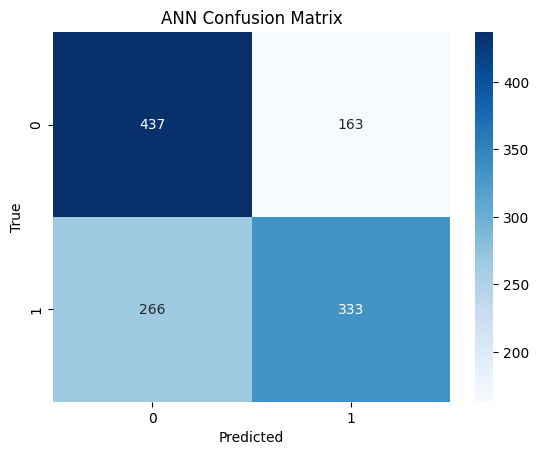

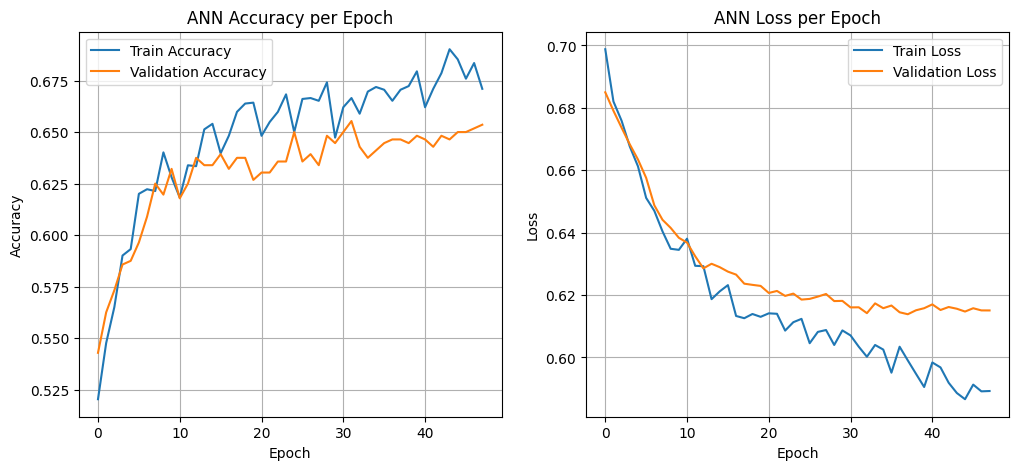

In [35]:
# ======================================================
# Artificial Neural Network (ANN) - Final Model
# ======================================================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

# برای اطمینان از تکرارپذیری
tf.random.set_seed(42)

# تعریف مدل
ann_final = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

ann_final.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# توقف زودهنگام برای جلوگیری از overfitting
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# آموزش مدل
history = ann_final.fit(X_train, y_train,
                        validation_split=0.2,
                        epochs=100,
                        batch_size=32,
                        callbacks=[es],
                        verbose=1)

# ارزیابی مدل
loss, acc = ann_final.evaluate(X_test, y_test, verbose=0)
print("\n=== ANN Test Results ===")
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

# پیش‌بینی روی داده تست
y_pred_ann = (ann_final.predict(X_test) > 0.5).astype("int32")

print("\n=== ANN Classification Report ===")
print(classification_report(y_test, y_pred_ann))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))

# ماتریس درهم‌ریختگی
sns.heatmap(confusion_matrix(y_test, y_pred_ann),
            annot=True, fmt='d', cmap='Blues')
plt.title("ANN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# نمودار تغییرات دقت و خطا در طول آموزش
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
=== Comparison of Models ===
                 Model  Accuracy  Precision    Recall  F1-Score
0                  KNN  0.641368   0.633491  0.669449  0.650974
1        Decision Tree  0.597998   0.601386  0.579299  0.590136
2        Random Forest  0.722269   0.726962  0.711185  0.718987
3                  SVM  0.655546   0.657095  0.649416  0.653233
4  Logistic Regression  0.509591   0.509499  0.492487  0.500849
5                  ANN  0.642202   0.671371  0.555927  0.608219


<Figure size 1000x600 with 0 Axes>

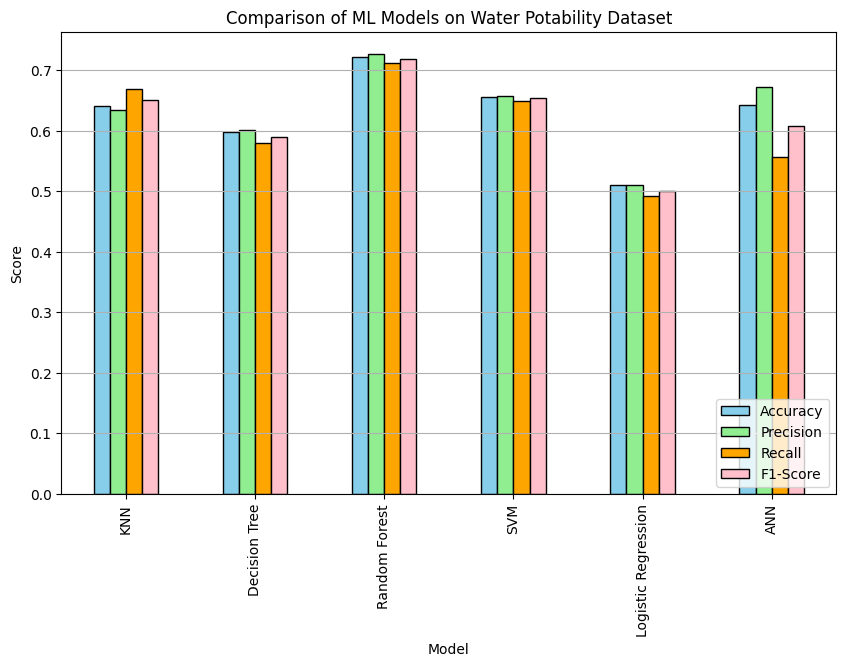

In [40]:
models = {
    "KNN": knn15_after_SMOTE,
    "Decision Tree": dt_final,
    "Random Forest": rf_final,
    "SVM": svm_final,
    "Logistic Regression": logreg_final,
    "ANN": ann_final
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    # در صورت مدل Keras (ANN) → خروجی را باینری کن
    if name == "ANN":
        y_pred = (y_pred > 0.5).astype("int32")

    # اگر خروجی دو بعدی بود (مثل [[0],[1],...]) → تختش کن
    if y_pred.ndim > 1:
        y_pred = y_pred.flatten()

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, acc, prec, rec, f1])

# ساخت جدول مقایسه
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("=== Comparison of Models ===")
print(results_df)

# رسم نمودار مقایسه
plt.figure(figsize=(10, 6))
results_df.plot(
    x="Model", 
    kind="bar",
    figsize=(10,6),
    color=["skyblue", "lightgreen", "orange", "pink", "lightcoral", "violet"],
    edgecolor='black'
)
plt.title("Comparison of ML Models on Water Potability Dataset")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(loc="lower right")
plt.grid(axis='y')
plt.show()